In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import warnings

In [5]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

In [9]:
data_dir = Path('../input/')
trn_file = data_dir / 'train.csv'
seed = 42

In [11]:
trn = pd.read_csv(trn_file, index_col=0)
print(trn.shape)
trn.head()

(320000, 19)


u        g        r        i        z    redshift  dered_u  dered_g  \
id                                                                              
0   23.2640  20.3368  19.0095  17.6724  16.9396 -8.1086e-05  23.1243  20.2578   
1   15.0521  14.0620  13.4524  13.2684  13.1689  4.5061e-03  14.9664  14.0045   
2   16.7864  15.8254  15.5363  15.3935  15.3500  4.7198e-04  16.6076  15.6866   
3   25.6606  21.1887  20.2212  19.8949  19.6346  5.8143e-06  25.3536  20.9947   
4   24.4534  20.6992  19.0424  18.3242  17.9826 -3.3247e-05  23.7714  20.4338   

    dered_r  dered_i  dered_z  nObserve  nDetect  airmass_u  airmass_g  \
id                                                                       
0   18.9551  17.6321  16.9089        18       18     1.1898     1.1907   
1   13.4114  13.2363  13.1347         1        1     1.2533     1.2578   
2   15.4400  15.3217  15.2961         2        2     1.0225     1.0241   
3   20.0873  19.7947  19.5552         4        3     1.2054     1.2061   
4   18.8630  18.1903  17.8759        13       12     1.1939     1.1943   

    airmass_r  airmass_i  airmass_z  class  
id                                          
0      1.1890     1.1894     1.1902      0  
1      1.2488     1.2510     1.2555      1  
2      1.0210     1.0217     1.0233      0  
3      1.2049     1.2051     1.2057      0  
4      1.1937     1.1938     1.1941      0

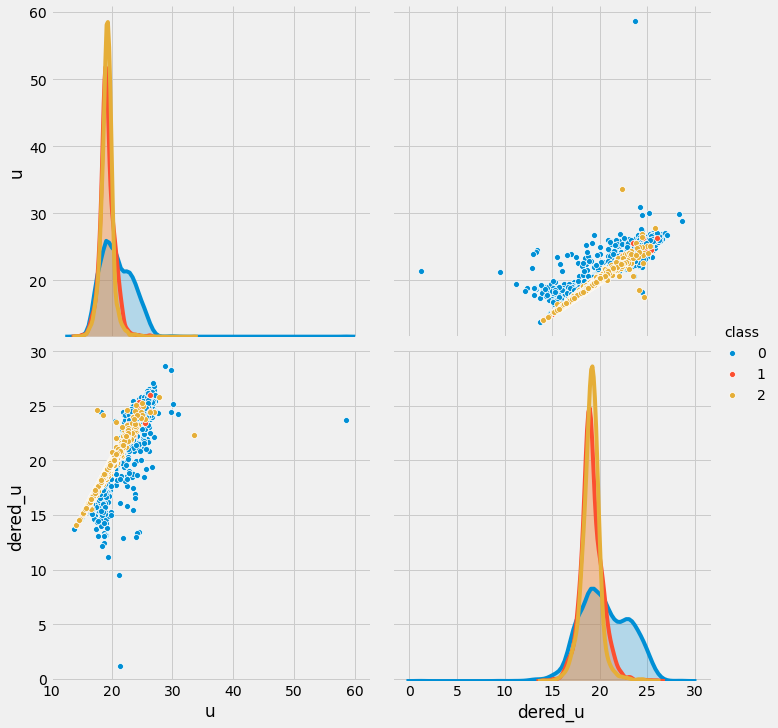

In [14]:
sns.pairplot(trn.sample(n=10000), vars=['u','dered_u'], hue='class',size=5)

In [15]:
X = trn[trn['class']!=0][['u']].values
y = trn[trn['class']!=0]['dered_u'].values
print(X.shape, y.shape)

(200004, 1) (200004,)


In [16]:
rmse = lambda y,p: np.sqrt(np.mean((y-p)**2))

In [25]:
alpha = .001 #running rate
theta0= .1
theta1= .1
epoch = 4 

In [24]:
x = X.flatten()
print(x.shape)

(200004,)


In [28]:
rmses = []
for i in range(epoch):
    for x_i, y_i in zip(x, y):
        p_i =  theta0 + theta1 * x_i
        theta0 = theta0 + alpha * (y_i - p_i)
        theta1 = theta1 + alpha * (y_i - p_i) * x_i
    rmses.append(rmse(y, theta0 + theta1 * x))

In [29]:
theta1, theta0

(0.9362306162023849, 1.1088813148478316)

In [30]:
rmses

[0.25618215910731906,
 0.25492967552380746,
 0.25461791287963526,
 0.25454708923095914]

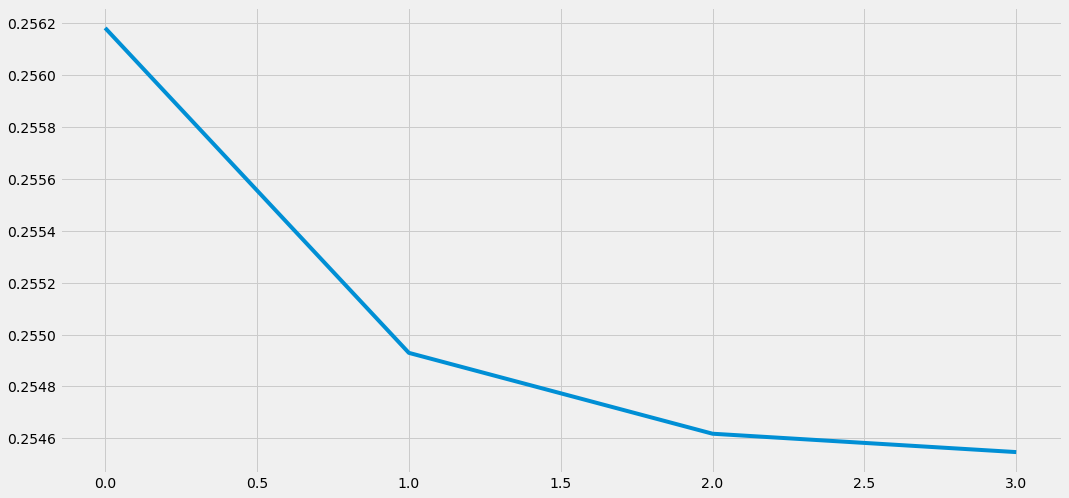

Exception ignored in: <function tqdm.__del__ at 0x000001C0B9D00318>
Traceback (most recent call last):
  File "C:\Users\user\.conda\envs\py37\lib\site-packages\tqdm\std.py", line 1090, in __del__
    self.close()
  File "C:\Users\user\.conda\envs\py37\lib\site-packages\tqdm\notebook.py", line 255, in close
    self.sp(bar_style='danger')
AttributeError: 'tqdm_notebook' object has no attribute 'sp'
Exception ignored in: <function tqdm.__del__ at 0x000001C0B9D00318>
Traceback (most recent call last):
  File "C:\Users\user\.conda\envs\py37\lib\site-packages\tqdm\std.py", line 1090, in __del__
    self.close()
  File "C:\Users\user\.conda\envs\py37\lib\site-packages\tqdm\notebook.py", line 255, in close
    self.sp(bar_style='danger')
AttributeError: 'tqdm_notebook' object has no attribute 'sp'


In [31]:
plt.plot(rmses)

Text(0, 0.5, 'dered_u')

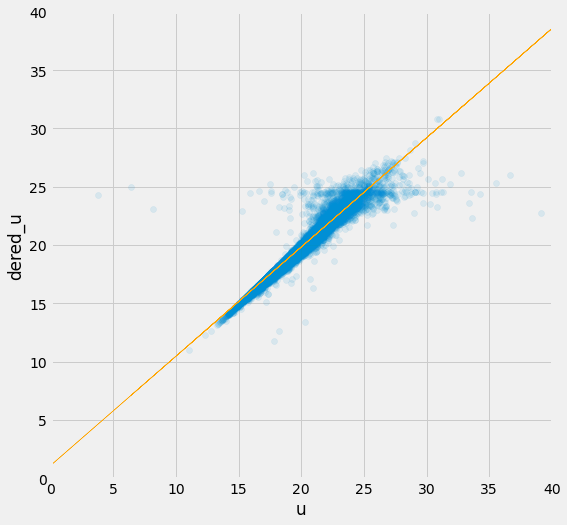

In [34]:
plt.figure(figsize=(8,8))
plt.scatter(X, y, alpha=.1)
plt.plot(X, theta0+theta1*x,color='orange',linewidth=.5)
plt.xlim(0,40)
plt.ylim(0,40)
plt.xlabel('u')
plt.ylabel('dered_u')

In [37]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)
p=lr.predict(X)

In [38]:
rmse(y,p)

0.2522450693360897

In [39]:
lr.coef_,lr.intercept_

(array([0.9320425]), 1.155642417862527)

In [41]:
plt.figure(figsize=(8,8))
plt.scatter(X, y, alpha=.1)
plt.plot(X, p, linewidth=.5)
plt.xlim(0,40)
plt.ylim(0,40)
plt.xlabel('u')
plt.ylabel('dered_u')

Exception ignored in: <function tqdm.__del__ at 0x000001C0B9D00318>
Traceback (most recent call last):
  File "C:\Users\user\.conda\envs\py37\lib\site-packages\tqdm\std.py", line 1090, in __del__
    self.close()
  File "C:\Users\user\.conda\envs\py37\lib\site-packages\tqdm\notebook.py", line 255, in close
    self.sp(bar_style='danger')
AttributeError: 'tqdm_notebook' object has no attribute 'sp'


Text(0, 0.5, 'dered_u')

In [42]:
X = trn[trn['class']!=0].drop('class', axis=1)
y=trn[trn['class']!=0]['class'].values-1

In [43]:
np.unique(y)

array([0, 1], dtype=int64)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score

lr= LogisticRegression()
lr.fit(X,y)
p = lr.predict_proba(X)[:,1]

In [46]:
lr.coef_, lr.intercept_

(array([[ 0.7963697 ,  0.0809331 , -1.87822929,  0.51060454, -0.56551304,
         -1.61844337,  2.27472353, -0.05000316, -1.3568166 ,  0.59866919,
         -0.5934478 ,  0.09457491, -0.11081194, -0.14695473, -0.14962635,
         -0.1444308 , -0.14567551, -0.1482729 ]]),
 array([0.22302068]))

In [47]:
log_loss(y,p)

0.36561788270180506

In [48]:
roc_auc_score(y,p)

0.8761747416753973

In [52]:
from kaggler.metrics import plot_roc_curve, plot_pr_curve #강의거 참고..

ModuleNotFoundError: No module named 'kaggler'

In [ ]:
plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plot_roc_curve(y, p);
plt.title('AUC Curve')
plt.subplot(1, 2, 2)
plot_pr_curve(y, p);
plt.title('Precision-Recall Curve')